# MINI PROJECT ON SVM KERNELS 
## TEAM NAME :
## TITLE : Heart Disease Classification Via Support Vector Machine Based on Kernels 
**Link For DataSet : https://archive.ics.uci.edu/ml/datasets/heart+disease**

## Introduction :

**Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you're born with (congenital heart defects), among others.**

**The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.**

**This dataset gives a number of variables along with a target condition of having or not having heart disease. Below, the data is first used in a simple " Support vector machine model and Kernel SVM ", and then the model is investigated using ML explainability tools and techniques.**

## Import libraries :

In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.offline as py
#from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
#from bubbly.bubbly import bubbleplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,precision_recall_curve,classification_report
#from pykernels.regular import Cossim,Exponential,Laplacian,RationalQuadratic,InverseMultiquadratic,Cauchy,TStudent,ANOVA,Wavelet,Fourier,Tanimoto,Sorensen,AdditiveChi2,Chi2,Min,GeneralizedHistogramIntersection,MinMax,Spline,Log,Power
plt.style.use('ggplot')
import pickle

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,**

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [3]:
df.shape

(303, 14)

## EDA :
### Part 1: Variable Identification

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Now, lets check wheather their is any NULL values in a DATASET or COLUMNS**

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**As we see there is no NULL values in a DATASET or EACH COLUMNS** 

In [7]:
unique_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal','target']

In [8]:
for i in unique_cols:
    print(i, "distinct values:")
    print(df[i].unique())       
    print("")
    print("-"*30)

sex distinct values:
[1 0]

------------------------------
cp distinct values:
[3 2 1 0]

------------------------------
fbs distinct values:
[1 0]

------------------------------
restecg distinct values:
[0 1 2]

------------------------------
exang distinct values:
[0 1]

------------------------------
slope distinct values:
[0 2 1]

------------------------------
ca distinct values:
[0 2 1 3 4]

------------------------------
thal distinct values:
[1 2 3 0]

------------------------------
target distinct values:
[1 0]

------------------------------


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [11]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [14]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [15]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [16]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [17]:

df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### step 2  and 3: Univariate Analysis & Bivariate Analysis

Text(0.5, 1.0, 'Correlation for the Dataset')

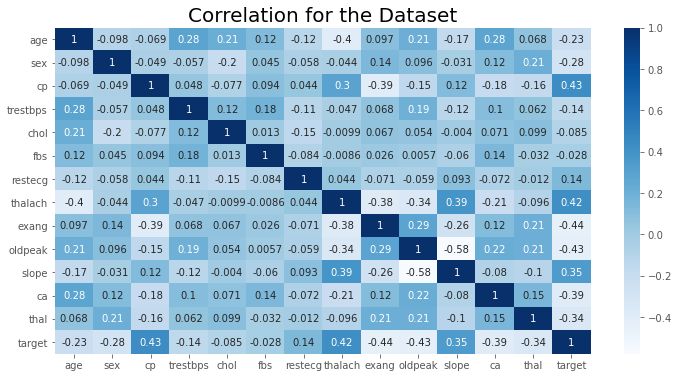

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title("Correlation for the Dataset",fontsize=20)

In [19]:
male=df.loc[df['sex']==1]
female=df.loc[df['sex']==0] 

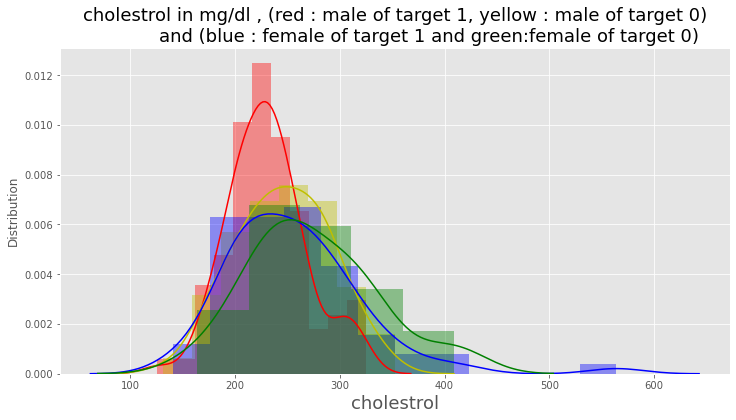

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(male['chol'].loc[male['target']==1],color='r')
sns.distplot(male['chol'].loc[male['target']==0],color='y')
sns.distplot(female['chol'].loc[female['target']==1],color='b')
sns.distplot(female['chol'].loc[female['target']==0],color='g')
plt.title("""cholestrol in mg/dl , (red : male of target 1, yellow : male of target 0)
            and (blue : female of target 1 and green:female of target 0)""",fontsize=18)
plt.xlabel("cholestrol",fontsize=18)
plt.ylabel("Distribution")
plt.show()

**Cholestrol is one of the factors for the Heart Disease.\
From the above plot:\
 1.Males have higher cholestrol compared to females and males have a risk to get Heart Disease.\
 2.females have lower risk to the Heart Disease compared to males.**

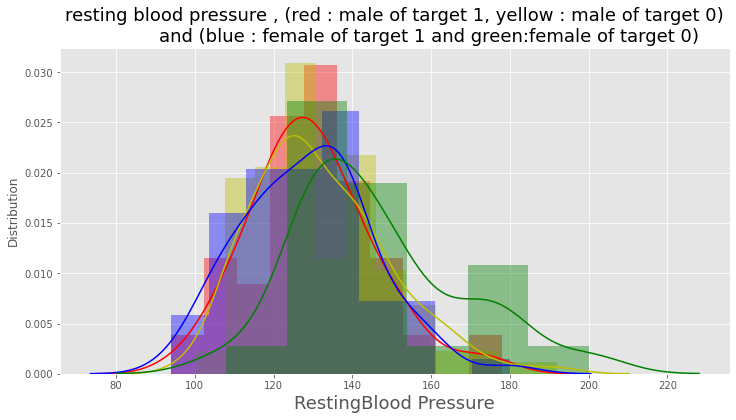

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(male['trestbps'].loc[male['target']==1],color='r')
sns.distplot(male['trestbps'].loc[male['target']==0],color='y')
sns.distplot(female['trestbps'].loc[female['target']==1],color='b')
sns.distplot(female['trestbps'].loc[female['target']==0],color='g')
plt.title("""resting blood pressure , (red : male of target 1, yellow : male of target 0)
            and (blue : female of target 1 and green:female of target 0)""",fontsize=18)
plt.xlabel("RestingBlood Pressure",fontsize=18)
plt.ylabel("Distribution")
plt.show()

**Blood pressure lies between 120-140 mm/Hg for both males and females.**

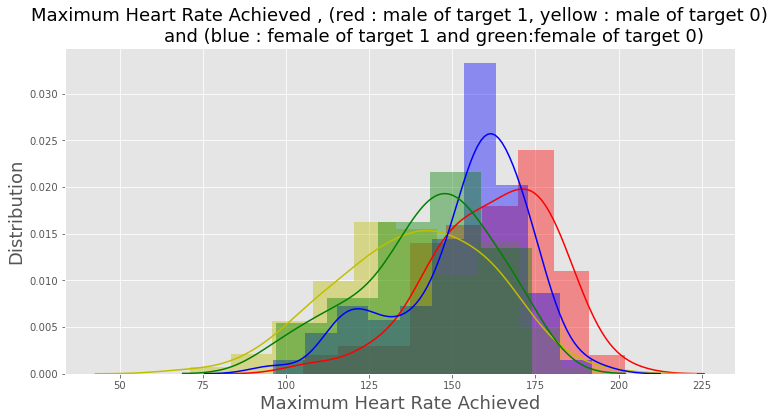

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(male['thalach'].loc[male['target']==1],color='r')
sns.distplot(male['thalach'].loc[male['target']==0],color='y')
sns.distplot(female['thalach'].loc[female['target']==1],color='b')
sns.distplot(female['thalach'].loc[female['target']==0],color='g')
plt.title("""Maximum Heart Rate Achieved , (red : male of target 1, yellow : male of target 0)
            and (blue : female of target 1 and green:female of target 0)""",fontsize=18)
plt.xlabel("Maximum Heart Rate Achieved",fontsize=18)
plt.ylabel("Distribution",fontsize=18)
plt.show()

**females have higher Heart rate compared to males.**

Text(0, 0.5, 'Distribution')

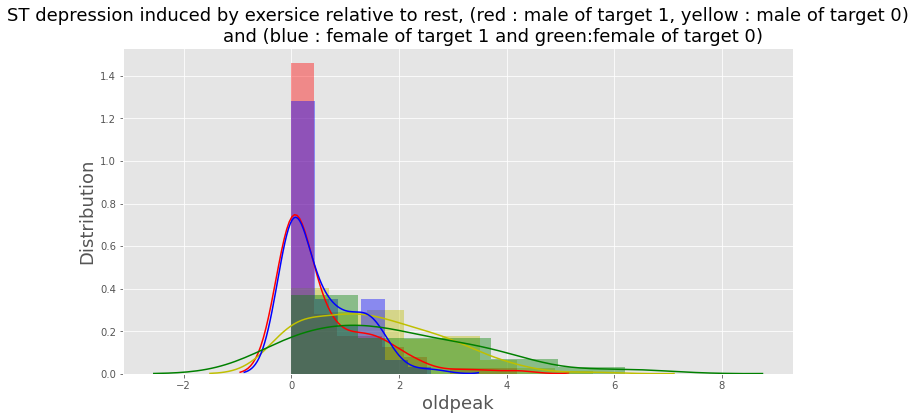

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(male['oldpeak'].loc[male['target']==1],color='r')
sns.distplot(male['oldpeak'].loc[male['target']==0],color='y')
sns.distplot(female['oldpeak'].loc[female['target']==1],color='b')
sns.distplot(female['oldpeak'].loc[female['target']==0],color='g')
plt.title("""ST depression induced by exersice relative to rest, (red : male of target 1, yellow : male of target 0)
            and (blue : female of target 1 and green:female of target 0)""",fontsize=18)
plt.xlabel("oldpeak",fontsize=18)
plt.ylabel("Distribution",fontsize=18)

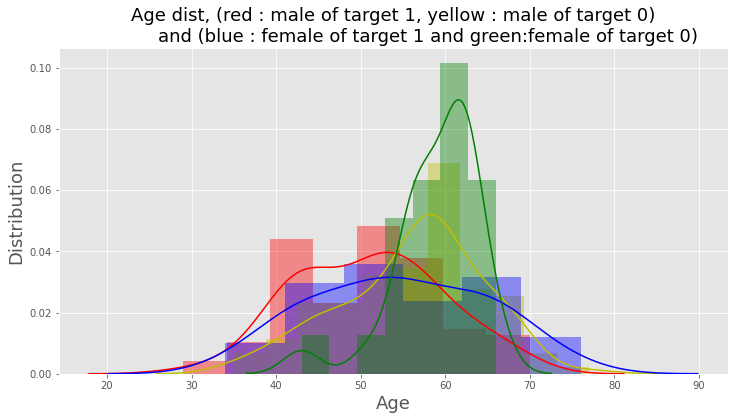

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(male['age'].loc[male['target']==1],color='r')
sns.distplot(male['age'].loc[male['target']==0],color='y')
sns.distplot(female['age'].loc[female['target']==1],color='b')
sns.distplot(female['age'].loc[female['target']==0],color='g')
plt.title("""Age dist, (red : male of target 1, yellow : male of target 0)
            and (blue : female of target 1 and green:female of target 0)""",fontsize=18)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Distribution",fontsize=18)
plt.show()

**As the age of the person increases ,there are more chances to get the Heart Diseases.\
As we can see:\
  1.Males have higher chances to get the Heart Disease in the age of 35-60yrs.\
  2.Females have a moderate risk to get Heart Disease.**

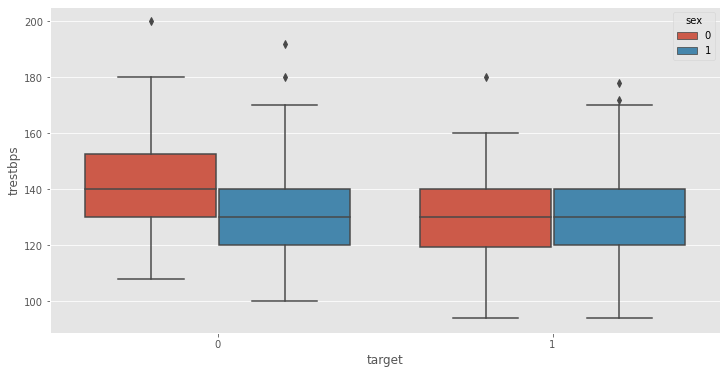

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target',y='trestbps',hue='sex',data=df)
plt.show()

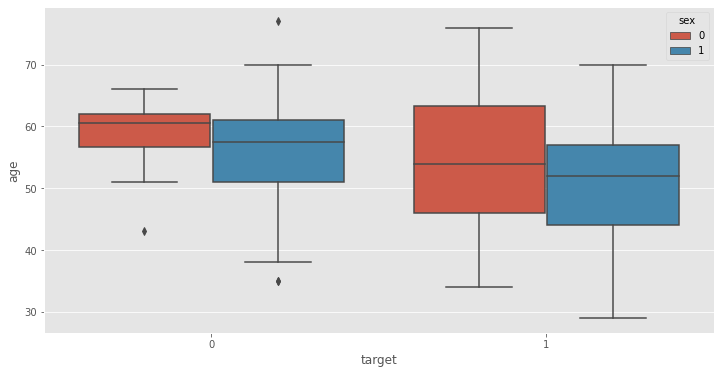

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target',y='age',hue='sex',data=df)
plt.show()

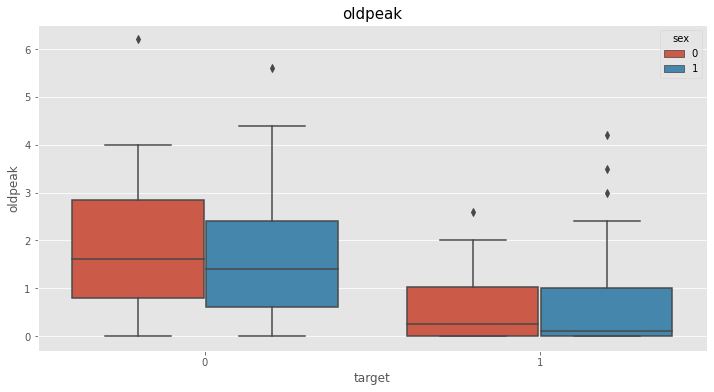

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target',y='oldpeak',hue='sex',data=df)
plt.title("oldpeak",fontsize=15)
plt.show()

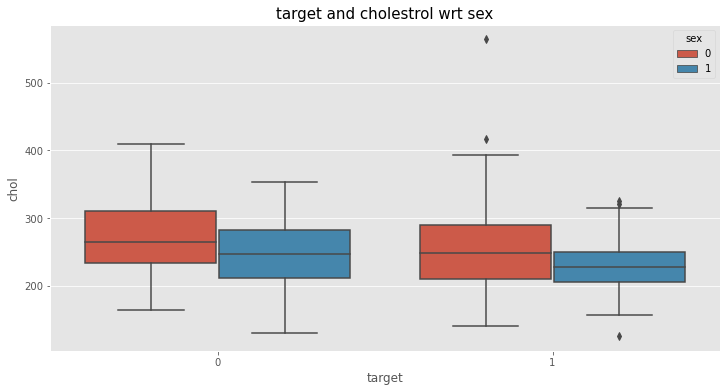

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target',y='chol',hue='sex',data=df)

plt.title("target and cholestrol wrt sex",fontsize=15)
plt.show()

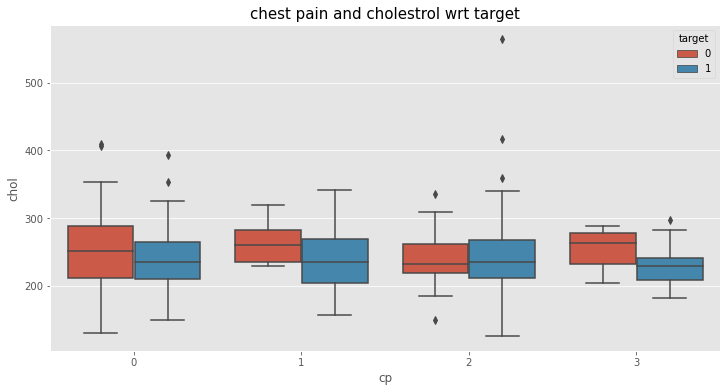

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cp',y='chol',hue='target',data=df)
plt.title("chest pain and cholestrol wrt target",fontsize=15)
plt.show()

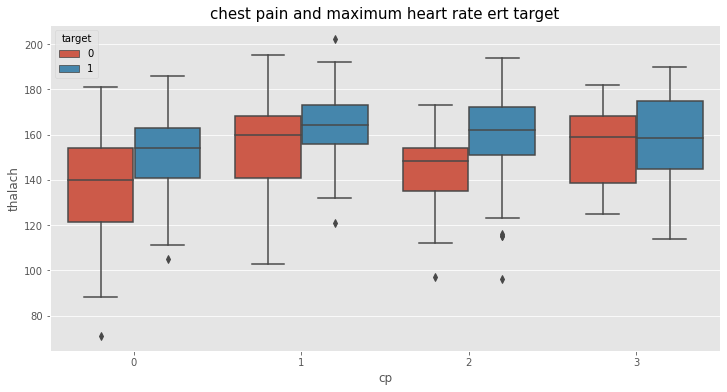

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cp',y='thalach',hue='target',data=df)
plt.title("chest pain and maximum heart rate ert target",fontsize=15)
plt.show()

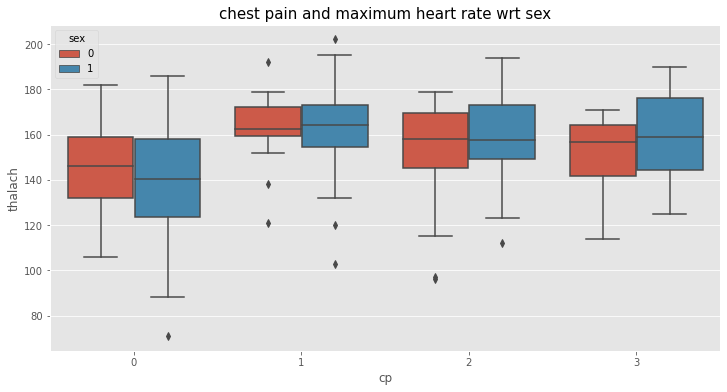

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cp',y='thalach',hue='sex',data=df)
plt.title("chest pain and maximum heart rate wrt sex",fontsize=15)
plt.show()

**People with Heart Disease \
    ( - )Blood pressure(trestbps) is normal.\
    ->Minimum age for Males is 29 and maximum is 70.\
    ->Minimunm age for Females is 35 and maximum is 77.\
    ->Old Peak is less compared to non-Heart Disease persons.\
    ->Cholestrol is moderately equal.\
    ->chest pain and cholestrol varies with the type of chest pain.\
    ->chest pain and maximum heart rate varies with the type of chest pain.\
    ->There are very high number people with type0 and type3 of chest pain with maximum heart rate.**

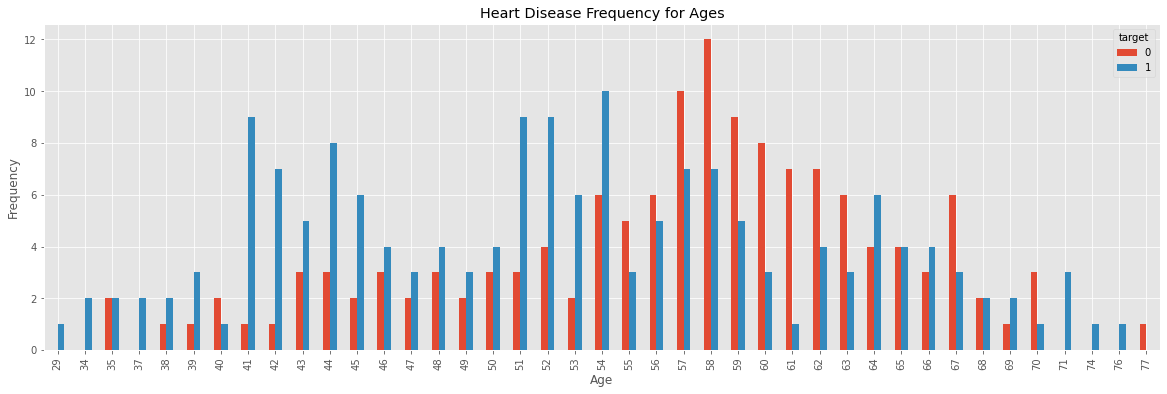

In [32]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**In the above plot:\
  1.Males generally suffer from Heart Disease in the Age(39 - 59).\
  2.Females suffer from Heart Disease in the Age(54 - 67).** 

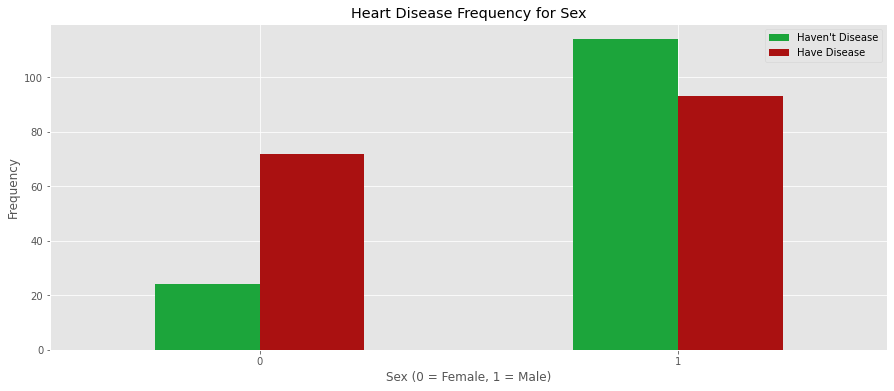

In [33]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

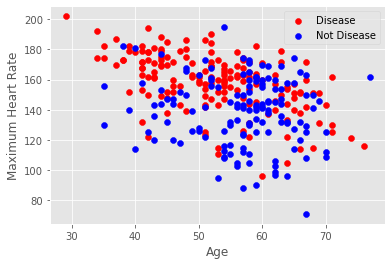

In [34]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c ='blue')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

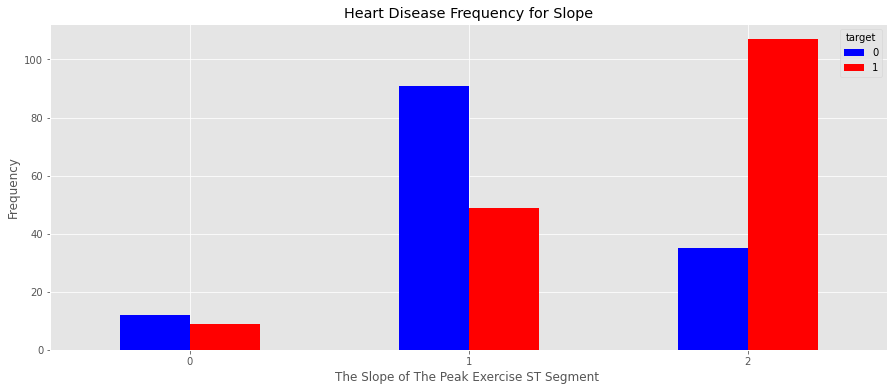

In [35]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

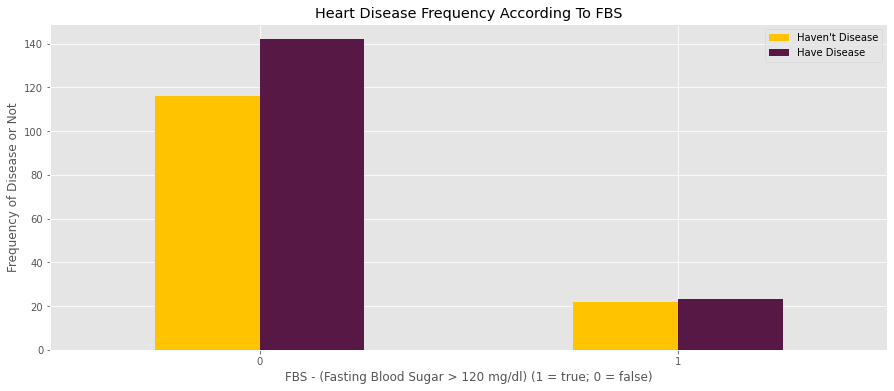

In [36]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

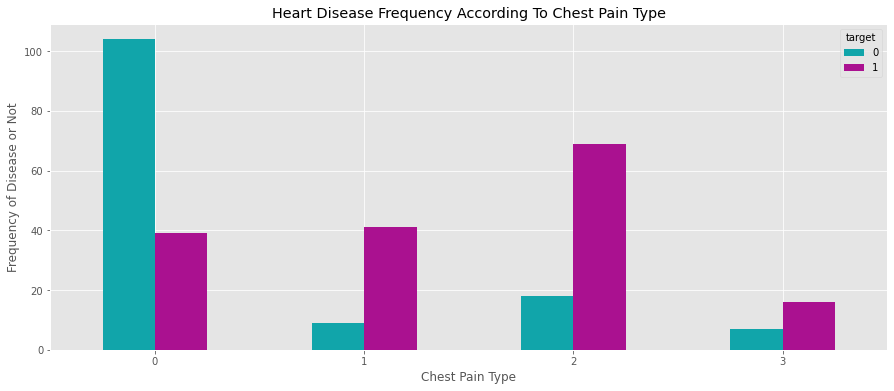

In [37]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Target percentage at different levels :
**Percentage at different level (cp, fbs, restecg, thal, sex,...) w.r.t Target.**

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df[['cp', 'target']].groupby(['cp'], as_index=False).mean().sort_values(by='target', ascending=False)

,cp,target
1,1,0.820000
2,2,0.793103
3,3,0.695652
0,0,0.272727


In [40]:
df[['fbs', 'target']].groupby(['fbs'], as_index=False).mean().sort_values(by='target', ascending=False)

,fbs,target
0,0,0.550388
1,1,0.511111


In [41]:
df[['restecg', 'target']].groupby(['restecg'], as_index=False).mean().sort_values(by='target', ascending=False)

,restecg,target
1,1,0.631579
0,0,0.462585
2,2,0.250000


In [42]:
df[['sex', 'target']].groupby(['sex'], as_index=False).mean().sort_values(by='target', ascending=False)

,sex,target
0,0,0.750000
1,1,0.449275


In [43]:
df[['exang', 'target']].groupby(['exang'], as_index=False).mean().sort_values(by='target', ascending=False)

,exang,target
0,0,0.696078
1,1,0.232323


In [44]:
df[['slope', 'target']].groupby(['slope'], as_index=False).mean().sort_values(by='target', ascending=False)

,slope,target
2,2,0.753521
0,0,0.428571
1,1,0.350000


In [45]:
df[['ca', 'target']].groupby(['ca'], as_index=False).mean().sort_values(by='target', ascending=False)

,ca,target
4,4,0.800000
0,0,0.742857
1,1,0.323077
2,2,0.184211
3,3,0.150000


In [46]:
df[['thal', 'target']].groupby(['thal'], as_index=False).mean().sort_values(by='target', ascending=False)

,thal,target
2,2,0.783133
0,0,0.500000
1,1,0.333333
3,3,0.239316


In [47]:
pd.crosstab([df.sex,df.target],df.cp,margins=True).style.background_gradient(cmap='RdYlGn')

In [48]:
pd.crosstab([df.sex,df.target],df.fbs,margins=True).style.background_gradient(cmap='RdYlGn')

In [49]:
pd.crosstab([df.sex,df.target],df.exang,margins=True).style.background_gradient(cmap='RdYlGn')

In [50]:
pd.crosstab([df.sex,df.target],df.slope,margins=True).style.background_gradient(cmap='RdYlGn')

In [51]:
pd.crosstab([df.sex,df.target],df.ca,margins=True).style.background_gradient(cmap='RdYlGn')

In [52]:
pd.crosstab([df.sex,df.target],df.thal,margins=True).style.background_gradient(cmap='RdYlGn')

In [53]:
pd.crosstab([df.sex,df.target],df.restecg,margins=True).style.background_gradient(cmap='RdYlGn')

In [54]:
pd.crosstab([df.sex,df.target],df.sex,margins=True).style.background_gradient(cmap='RdYlGn')

## step 4: missing value treatment

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**So, we find their is no missing values found in the dataset**

**Now, we plot a heatmap to detect the missing values**

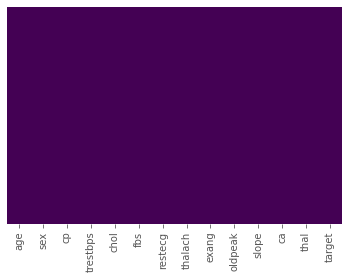

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Step 6: Feature Engineering - Variable and Dummy Variable Creation

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df= pd.get_dummies(df, columns=['cp','restecg','slope','ca','thal'], drop_first=True)

In [8]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
df.shape

(303, 23)

In [10]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

### Step 7: Feature Engineering - Variable Transformation
#### a. Creating Feature and Target variable :

In [11]:
Feature=df.drop(['target'],axis=1).values

Target=df['target'].values

In [12]:
print("Feature shape :\n",Feature.shape)
print("Target shape :\n",Target.shape)

Feature shape :
 (303, 22)
Target shape :
 (303,)


#### b. Split the data into train test :

In [13]:
X_train,X_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.2,random_state=24)

In [14]:
print("X_train shape :\n",X_train.shape)
print("y_train shape :\n",y_train.shape)
print("X_test shape :\n",X_test.shape)
print("y_test shape :\n",y_test.shape)

X_train shape :
 (242, 22)
y_train shape :
 (242,)
X_test shape :
 (61, 22)
y_test shape :
 (61,)


**Feature Scaling for Model Performance :**

In [15]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
np.set_printoptions(suppress=True) #convert exponential form to normal form

## Building Model on different KERNEL SVM :

## **1.  by default kernel is RBF**

In [17]:
model=SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [18]:
y_pred=model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_t=model.predict(X_train)

Confusion metrics : default kernel 
 [[23  6]
 [ 5 27]]


<AxesSubplot:>

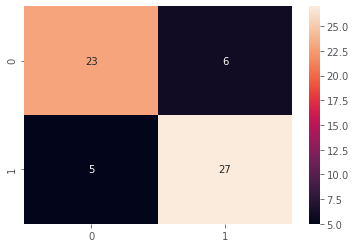

In [19]:
cn_1=confusion_matrix(y_test,y_pred)
print("Confusion metrics : default kernel \n",cn_1)
sns.heatmap(cn_1,annot=True,cbar=True)

In [20]:
train_score=accuracy_score(y_train, y_pred_t)*100
test_score=accuracy_score(y_test, y_pred)*100
print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)

Train Accuracy:  93.38842975206612
Test Accuracy:  81.9672131147541


In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [22]:
precision = precision_score(y_test,y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))  

Precision :: 81.82
Recall    :: 84.38
Specificity :: 79.31
F1score   :: 83.08


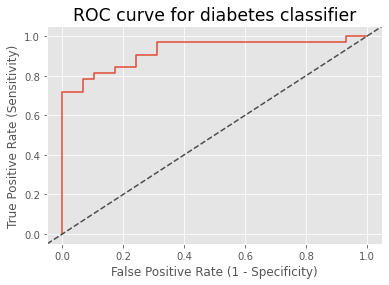

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [24]:
Accuracy = pd.DataFrame(data=[["Default SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.38843,81.967213,81.818182,84.375,79.310345,83.076923


## **2. Linear kernel :**

**Linear Kernel is used when data are linearly separable**

In [76]:
lin_model = SVC(kernel='linear',probability=True)
lin_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
y_pred1=lin_model.predict(X_test)
Y_pred_prob1= lin_model.predict_proba(X_test)[:,1]
y_pred_t1=lin_model.predict(X_train)

Confusion metrics : Linear
 [[22  7]
 [ 4 28]]


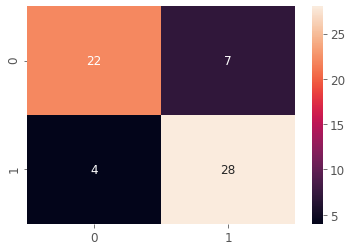

In [78]:
cn_2=confusion_matrix(y_test,y_pred1)
print("Confusion metrics : Linear\n",cn_2)
sns.heatmap(cn_2,annot=True,cbar=True)

In [79]:
train_score = accuracy_score(y_train, y_pred_t1)*100
test_score = accuracy_score(y_test, y_pred1)*100
print("Train Accuracy on linear kernel : ", train_score)
print("Test Accuracy on linear kernel: ", test_score)

Train Accuracy on linear kernel :  88.01652892561982
Test Accuracy on linear kernel:  81.9672131147541


In [80]:
report1 = classification_report(y_test,y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [81]:
precision = precision_score(y_test,y_pred1)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,y_pred1)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,y_pred1)*100
print("F1score   :: {}".format("%.2f" %fscore))  

Precision :: 80.00
Recall    :: 87.50
Specificity :: 75.86
F1score   :: 83.58


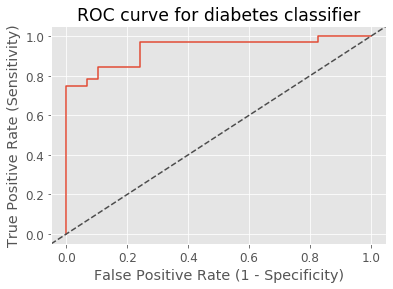

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [83]:
Accuracy1 = pd.DataFrame(data=[["Linear SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy1, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090


## **3. Polynomial Kernel :**

**It represents the similarity of vectors in training set of data in features space over polynomials of the original varibles used in kernel**

In [84]:
poly_model = SVC(kernel='poly', degree = 2,random_state=42, probability=True)
poly_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
poly_y_pred=poly_model.predict(X_test)
poly_y_pred_prob = poly_model.predict_proba(X_test)[:,1]
poly_y_pred_t=poly_model.predict(X_train)

Confusion metrics : polynomial 
 [[18 11]
 [ 4 28]]


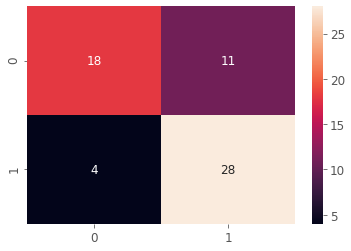

In [86]:
poly_cn=confusion_matrix(y_test,poly_y_pred)
print("Confusion metrics : polynomial \n",poly_cn)
sns.heatmap(poly_cn,annot=True,cbar=True)

In [87]:
train_score = accuracy_score(y_train, poly_y_pred_t)*100
test_score = accuracy_score(y_test, poly_y_pred)*100
print("Train Accuracy on poly kernel : ", train_score)
print("Test Accuracy on poly kernel: ",test_score )

Train Accuracy on poly kernel :  88.01652892561982
Test Accuracy on poly kernel:  75.40983606557377


In [88]:
poly_report = classification_report(y_test,poly_y_pred)
print(poly_report)

              precision    recall  f1-score   support

           0       0.82      0.62      0.71        29
           1       0.72      0.88      0.79        32

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



In [89]:
precision = precision_score(y_test,poly_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,poly_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, poly_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,poly_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))  

Precision :: 71.79
Recall    :: 87.50
Specificity :: 62.07
F1score   :: 78.87


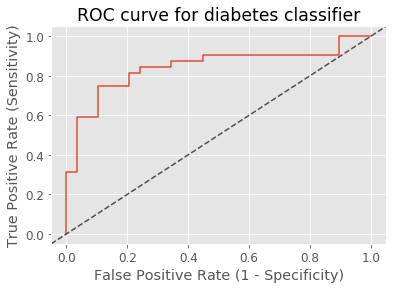

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, poly_y_pred_prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [91]:
Accuracy2 = pd.DataFrame(data=[["Polynomial SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy2, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239


## **4. Sigmoid Kernel :**

In [92]:
sig_model = SVC(kernel = 'sigmoid',probability=True)
sig_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [93]:
sig_y_pred = sig_model.predict(X_test)
sig_y_pred_prob = sig_model.predict_proba(X_test)[:,1]
sig_y_pred_t=sig_model.predict(X_train)

Confusion metrics : Sigmoid 
 [[24  5]
 [ 1 31]]


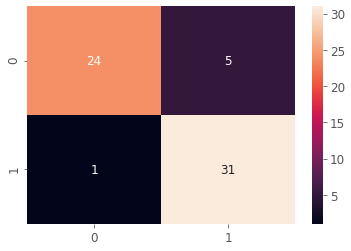

In [94]:
sig_cn=confusion_matrix(y_test,sig_y_pred)
print("Confusion metrics : Sigmoid \n",sig_cn)
sns.heatmap(sig_cn,annot=True,cbar=True)

In [95]:
train_score = accuracy_score(y_train, sig_y_pred_t)*100
test_score = accuracy_score(y_test, sig_y_pred)*100
print("Train Accuracy on Sigmoid kernel : ",train_score)
print("Test Accuracy on Sigmoid kernel: ", test_score)

Train Accuracy on Sigmoid kernel :  81.81818181818183
Test Accuracy on Sigmoid kernel:  90.1639344262295


In [96]:
sig_report = classification_report(y_test,sig_y_pred)
print(sig_report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [97]:
precision = precision_score(y_test,sig_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,sig_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, sig_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,sig_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))  

Precision :: 86.11
Recall    :: 96.88
Specificity :: 82.76
F1score   :: 91.18


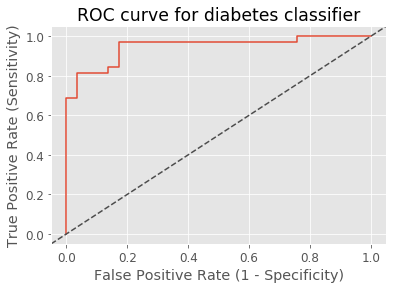

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, sig_y_pred_prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [99]:
Accuracy3 = pd.DataFrame(data=[["Sigmod SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy3, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471


## **5. Gaussian Kernel :**

In [100]:
gaus_model = SVC(kernel = 'rbf',gamma='auto',probability=True)
gaus_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
gaus_y_pred = gaus_model.predict(X_test)
gaus_y_pred_Prob = gaus_model.predict_proba(X_test)[:,1]
gaus_y_pred_t=gaus_model.predict(X_train)

Confusion metrics : Gaussian RBF
 [[23  6]
 [ 5 27]]


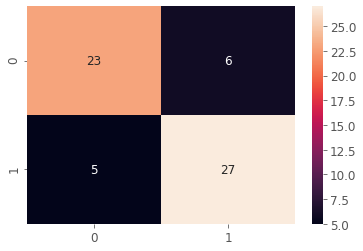

In [102]:
gaus_cn=confusion_matrix(y_test,gaus_y_pred)
print("Confusion metrics : Gaussian RBF\n",gaus_cn)
sns.heatmap(gaus_cn,annot=True,cbar=True)

In [103]:
train_score = accuracy_score(y_train, gaus_y_pred_t)*100
test_score = accuracy_score(y_test, gaus_y_pred)*100
print("Train Accuracy on gaussian kernel : ", train_score)
print("Test Accuracy on gaussian kernel: ", test_score)

Train Accuracy on gaussian kernel :  93.38842975206612
Test Accuracy on gaussian kernel:  81.9672131147541


In [104]:
gaus_report = classification_report(y_test,gaus_y_pred)
print(gaus_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [105]:
precision = precision_score(y_test,gaus_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,gaus_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, gaus_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,gaus_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))  

Precision :: 81.82
Recall    :: 84.38
Specificity :: 79.31
F1score   :: 83.08


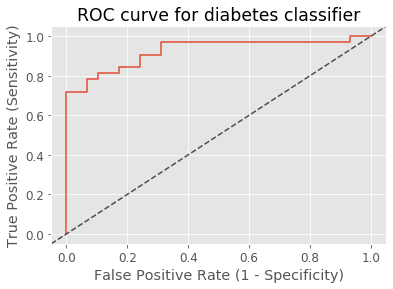

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, gaus_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [107]:
Accuracy4 = pd.DataFrame(data=[["Gaussian rbf SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy4, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923


## **6. Cosine similarity Kernel :**

In [108]:
cos_model = SVC(kernel = Cossim(),probability=True)
cos_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=Cossim,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [109]:
cos_y_pred = cos_model.predict(X_test)
cos_y_predProb = cos_model.predict_proba(X_test)[:,1]
cos_y_pred_t = cos_model.predict(X_train)

Confusion metrics : Cosine similarity 
 [[23  6]
 [ 2 30]]


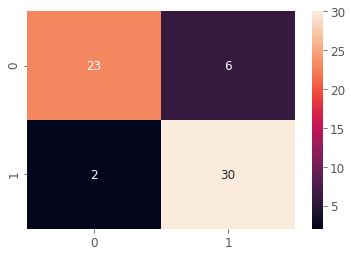

In [110]:
cos_cn=confusion_matrix(y_test,cos_y_pred)
print("Confusion metrics : Cosine similarity \n",cos_cn)
sns.heatmap(cos_cn,annot=True,cbar=True)

In [111]:
train_score = accuracy_score(y_train, cos_y_pred_t)*100
test_score = accuracy_score(y_test, cos_y_pred) *100
print("Train Accuracy on Cosine kernel : ", train_score)
print("Test Accuracy on Cosine kernel: ", test_score)

Train Accuracy on Cosine kernel :  85.9504132231405
Test Accuracy on Cosine kernel:  86.88524590163934


In [112]:
cos_report = classification_report(y_test,cos_y_pred)
print(cos_report)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.83      0.94      0.88        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [113]:
precision = precision_score(y_test,cos_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,cos_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, cos_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,cos_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 83.33
Recall    :: 93.75
Specificity :: 79.31
F1score   :: 88.24


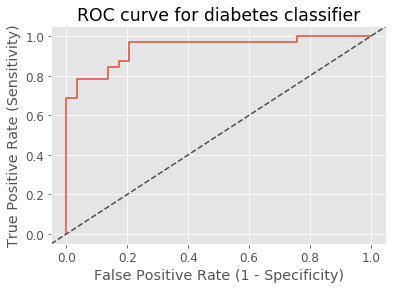

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, cos_y_predProb)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [115]:
Accuracy5 = pd.DataFrame(data=[["Cosine similarity SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy5, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294


## **7. Exponential Kernel :**

In [116]:
exp_model = SVC(kernel = Exponential(),probability=True)
exp_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=Exponential,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [117]:
exp_y_pred = exp_model.predict(X_test)
exp_y_pred_t = exp_model.predict(X_train)
exp_y_pred_Prob = exp_model.predict_proba(X_test)[:,1]

Confusion metrics : Exponential 
 [[23  6]
 [ 3 29]]


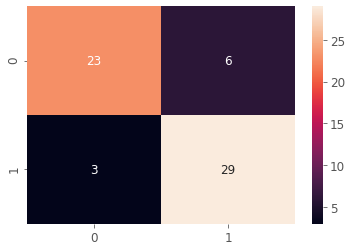

In [118]:
exp_cn=confusion_matrix(y_test,exp_y_pred)
print("Confusion metrics : Exponential \n",exp_cn)
sns.heatmap(exp_cn,annot=True,cbar=True)

In [119]:
train_score = accuracy_score(y_train, exp_y_pred_t) *100
test_score = accuracy_score(y_test, exp_y_pred)*100
print("Train Accuracy on exponential kernel : ", train_score)
print("Test Accuracy on exponential kernel: ", test_score)

Train Accuracy on exponential kernel :  88.42975206611571
Test Accuracy on exponential kernel:  85.24590163934425


In [120]:
exp_report = classification_report(y_test,exp_y_pred)
print(exp_report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [121]:
precision = precision_score(y_test,exp_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,exp_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, exp_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,exp_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 82.86
Recall    :: 90.62
Specificity :: 79.31
F1score   :: 86.57


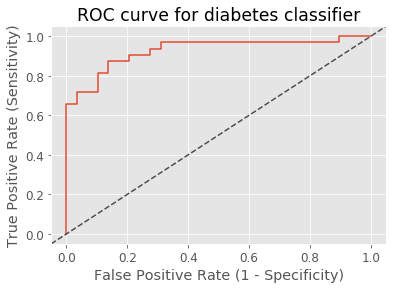

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, exp_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [123]:
Accuracy6 = pd.DataFrame(data=[["Exponential SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy6, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164


## **8. Laplace RBF Kernel :**

In [124]:
lap_model = SVC(kernel = Laplacian(),probability=True)
lap_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=Laplacian,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [125]:
lap_y_pred = lap_model.predict(X_test)
lap_y_pred_Prob = lap_model.predict_proba(X_test)[:,1]
lap_y_pred_t = lap_model.predict(X_train)

Confusion metrics : Laplace 
 [[23  6]
 [ 3 29]]


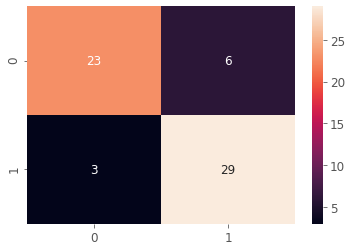

In [126]:
lap_cn=confusion_matrix(y_test,lap_y_pred)
print("Confusion metrics : Laplace \n",lap_cn)
sns.heatmap(lap_cn,annot=True,cbar=True)

In [127]:
train_score =  accuracy_score(y_train, lap_y_pred_t)*100
test_score = accuracy_score(y_test, lap_y_pred)*100
print("Train Accuracy on Laplase kernel : ",train_score)
print("Test Accuracy on Laplase kernel: ", test_score)

Train Accuracy on Laplase kernel :  88.42975206611571
Test Accuracy on Laplase kernel:  85.24590163934425


In [128]:
lap_report = classification_report(y_test,lap_y_pred)
print(lap_report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [129]:
precision = precision_score(y_test,lap_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,lap_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, lap_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,lap_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 82.86
Recall    :: 90.62
Specificity :: 79.31
F1score   :: 86.57


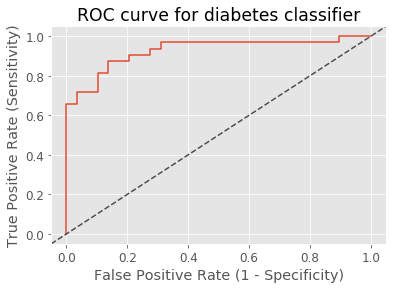

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, lap_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [131]:
Accuracy7 = pd.DataFrame(data=[["Laplase SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy7, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164


## 9. RationalQuadratic Kernel :

In [132]:
rq_model = SVC(kernel = RationalQuadratic(),probability=True)
rq_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=RationalQuadratic, max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [133]:
rq_y_pred = rq_model.predict(X_test)
rq_y_predProb = rq_model.predict_proba(X_test)[:,1]
rq_y_pred_t = rq_model.predict(X_train)

Confusion metrics : Laplace 
 [[24  5]
 [ 3 29]]


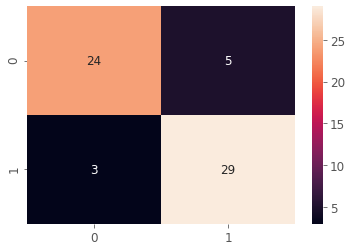

In [134]:
rq_cn=confusion_matrix(y_test,rq_y_pred)
print("Confusion metrics : Laplace \n",rq_cn)
sns.heatmap(rq_cn,annot=True,cbar=True)

In [135]:
train_score = accuracy_score(y_train, rq_y_pred_t)*100
test_score = accuracy_score(y_test, rq_y_pred)*100
print("Train Accuracy on Sigmoid kernel : ", train_score)
print("Test Accuracy on Sigmoid kernel: ", test_score)

Train Accuracy on Sigmoid kernel :  99.58677685950413
Test Accuracy on Sigmoid kernel:  86.88524590163934


In [136]:
rq_report = classification_report(y_test,rq_y_pred)
print(rq_report)


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [137]:
precision = precision_score(y_test,rq_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,rq_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, rq_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,rq_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 85.29
Recall    :: 90.62
Specificity :: 82.76
F1score   :: 87.88


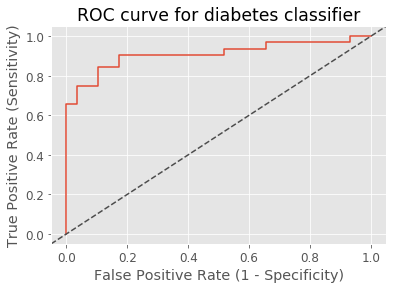

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, rq_y_predProb)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [139]:
Accuracy8 = pd.DataFrame(data=[["RationalQuadratic SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy8, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788


## 10. ANOVA Kernel :

In [140]:
an_model = SVC(kernel = ANOVA(),probability=True)
an_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=ANOVA,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [141]:
an_y_pred = an_model.predict(X_test)
an_y_pred_Prob = an_model.predict_proba(X_test)[:,1]
an_y_pred_t = an_model.predict(X_train)

Confusion metrics : Laplace 
 [[23  6]
 [ 4 28]]


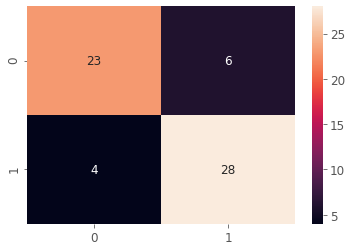

In [142]:
an_cn=confusion_matrix(y_test,an_y_pred)
print("Confusion metrics : Laplace \n",an_cn)
sns.heatmap(an_cn,annot=True,cbar=True)

In [143]:
train_score = accuracy_score(y_train, an_y_pred_t)*100
test_score = accuracy_score(y_test, an_y_pred)*100
print("Train Accuracy on ANOVA kernel : ", train_score)
print("Test Accuracy on ANOVA kernel: ", test_score)

Train Accuracy on ANOVA kernel :  90.08264462809917
Test Accuracy on ANOVA kernel:  83.60655737704919


In [144]:
an_report = classification_report(y_test,an_y_pred)
print(an_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [145]:
precision = precision_score(y_test,an_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,an_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, an_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,an_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 82.35
Recall    :: 87.50
Specificity :: 79.31
F1score   :: 84.85


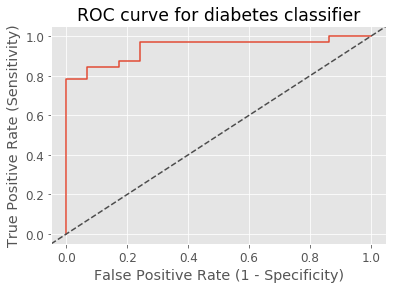

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, an_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [147]:
Accuracy9 = pd.DataFrame(data=[["ANOVA SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy9, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788
9,ANOVA SVM kernel,90.082645,83.606557,82.352941,87.500,79.310345,84.848485


## 11. Additive Chi^2 kernel SVM :

In [148]:
chi1_model = SVC(kernel = AdditiveChi2(),probability=True)
chi1_model.fit(X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=AdditiveChi2,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [149]:
chi1_y_pred = chi1_model.predict(X_test)
chi1_y_pred_Prob = chi1_model.predict_proba(X_test)[:,1]
chi1_y_pred_t = chi1_model.predict(X_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!



Confusion metrics : Laplace 
 [[ 9 20]
 [16 16]]


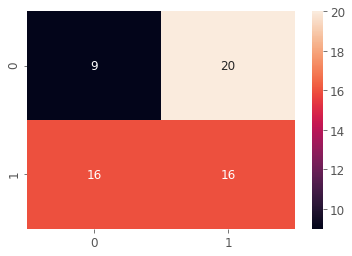

In [150]:
chi1_cn=confusion_matrix(y_test,chi1_y_pred)
print("Confusion metrics : Laplace \n",chi1_cn)
sns.heatmap(chi1_cn,annot=True,cbar=True)

In [151]:
train_score = accuracy_score(y_train, chi1_y_pred_t)*100
test_score = accuracy_score(y_test, chi1_y_pred)*100
print("Train Accuracy on Additive chi^2 kernel : ", train_score)
print("Test Accuracy on Additive Chi^2 kernel: ", test_score)

Train Accuracy on Additive chi^2 kernel :  42.14876033057851
Test Accuracy on Additive Chi^2 kernel:  40.98360655737705


In [152]:
chi1_report = classification_report(y_test,chi1_y_pred)
print(chi1_report)

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        29
           1       0.44      0.50      0.47        32

    accuracy                           0.41        61
   macro avg       0.40      0.41      0.40        61
weighted avg       0.40      0.41      0.41        61



In [153]:
precision = precision_score(y_test,chi1_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,chi1_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, chi1_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,chi1_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 44.44
Recall    :: 50.00
Specificity :: 31.03
F1score   :: 47.06


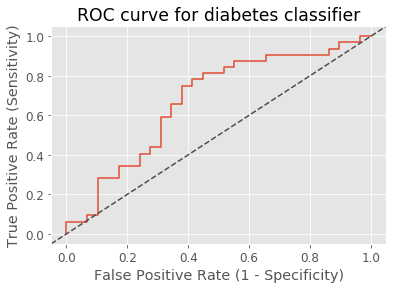

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, chi1_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [155]:
Accuracy10 = pd.DataFrame(data=[["Additive Chi^2 SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy10, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788
9,ANOVA SVM kernel,90.082645,83.606557,82.352941,87.500,79.310345,84.848485


## 12. Chi ^ 2 kernel SVM :

In [156]:
chi2_model = SVC(kernel = AdditiveChi2(),probability=True)
chi2_model.fit(X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=AdditiveChi2,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [157]:
chi2_y_pred = chi2_model.predict(X_test)
chi2_y_pred_Prob = chi2_model.predict_proba(X_test)[:,1]
chi2_y_pred_t = chi2_model.predict(X_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pykernels/regular.py:354: UserWarning:

Additive Chi^2 kernel requires data to be strictly positive!



Confusion metrics : Chi^2 
 [[ 9 20]
 [16 16]]


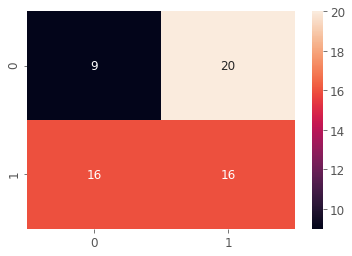

In [158]:
chi2_cn=confusion_matrix(y_test,chi2_y_pred)
print("Confusion metrics : Chi^2 \n",chi2_cn)
sns.heatmap(chi2_cn,annot=True,cbar=True)

In [159]:
train_score = accuracy_score(y_train, chi2_y_pred_t)*100
test_score = accuracy_score(y_test, chi2_y_pred)*100
print("Train Accuracy on Chi^2 kernel : ", train_score)
print("Test Accuracy on Chi^2 kernel: ", test_score)

Train Accuracy on Chi^2 kernel :  42.14876033057851
Test Accuracy on Chi^2 kernel:  40.98360655737705


In [160]:
chi2_report = classification_report(y_test,chi2_y_pred)
print(chi2_report)

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        29
           1       0.44      0.50      0.47        32

    accuracy                           0.41        61
   macro avg       0.40      0.41      0.40        61
weighted avg       0.40      0.41      0.41        61



In [161]:
precision = precision_score(y_test,chi2_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,chi2_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, chi2_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,chi2_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 44.44
Recall    :: 50.00
Specificity :: 31.03
F1score   :: 47.06


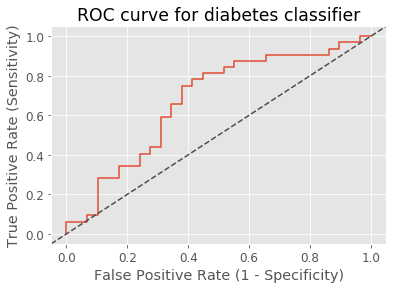

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, chi2_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [163]:
Accuracy11 = pd.DataFrame(data=[["Chi^2 SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy11, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788
9,ANOVA SVM kernel,90.082645,83.606557,82.352941,87.500,79.310345,84.848485


## 13. Power Kernel SVM :

In [164]:
pow_model= SVC(kernel = Power(),probability=True)
pow_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel=Power,
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [165]:
pow_y_pred = pow_model.predict(X_test)
pow_y_pred_Prob = pow_model.predict_proba(X_test)[:,1]
pow_y_pred_t = pow_model.predict(X_train)

Confusion metrics : Power 
 [[22  7]
 [ 6 26]]


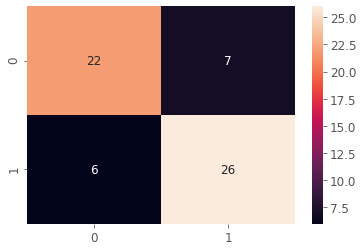

In [166]:
pow_cn=confusion_matrix(y_test,pow_y_pred)
print("Confusion metrics : Power \n",pow_cn)
sns.heatmap(pow_cn,annot=True,cbar=True)

In [167]:
train_score = accuracy_score(y_train, pow_y_pred_t)*100
test_score = accuracy_score(y_test, pow_y_pred)*100
print("Train Accuracy on Power kernel : ", train_score)
print("Test Accuracy on Power kernel: ", test_score)

Train Accuracy on Power kernel :  74.3801652892562
Test Accuracy on Power kernel:  78.68852459016394


In [168]:
pow_report = classification_report(y_test,pow_y_pred)
print(pow_report)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [169]:
precision = precision_score(y_test,pow_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,pow_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, pow_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,pow_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 78.79
Recall    :: 81.25
Specificity :: 75.86
F1score   :: 80.00


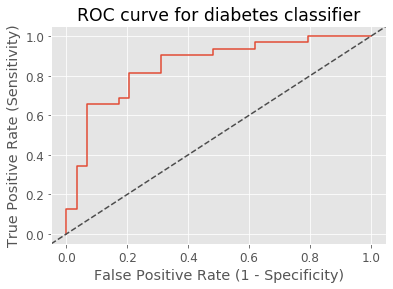

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, pow_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [171]:
Accuracy12 = pd.DataFrame(data=[["Power SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy12, ignore_index=True)
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788
9,ANOVA SVM kernel,90.082645,83.606557,82.352941,87.500,79.310345,84.848485


## 14. Generalized histogram intersection kernel SVM :

In [68]:
gh_model = SVC(kernel = GeneralizedHistogramIntersection(),probability=True)
gh_model.fit(X_train,y_train)

SVC(kernel=GeneralizedHistogramIntersection, probability=True)

In [69]:
gh_y_pred = gh_model.predict(X_test)
gh_y_pred_Prob = gh_model.predict_proba(X_test)[:,1]
gh_y_pred_t = gh_model.predict(X_train)

Confusion metrics : Generalized histogram intersection kernel 
 [[24  5]
 [ 1 31]]


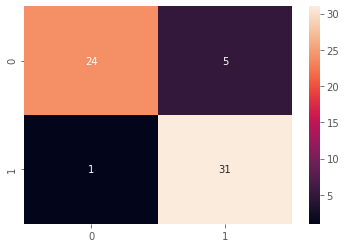

In [70]:
gh_cn=confusion_matrix(y_test,gh_y_pred)
print("Confusion metrics : Generalized histogram intersection kernel \n",gh_cn)
sns.heatmap(gh_cn,annot=True,cbar=True)

In [71]:
train_score = accuracy_score(y_train, gh_y_pred_t)*100
test_score = accuracy_score(y_test, gh_y_pred)*100
print("Train Accuracy on Generelized histogram intersection kernel : ", train_score)
print("Test Accuracy on Generelized histogram intersection kernel: ", test_score)

Train Accuracy on Generelized histogram intersection kernel :  90.49586776859503
Test Accuracy on Generelized histogram intersection kernel:  90.1639344262295


In [72]:
gh_report = classification_report(y_test,gh_y_pred)
print(gh_report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [73]:
precision = precision_score(y_test,gh_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,gh_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, gh_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,gh_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 86.11
Recall    :: 96.88
Specificity :: 82.76
F1score   :: 91.18


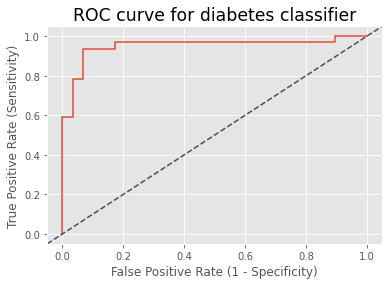

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, gh_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [81]:
Accuracy13 = pd.DataFrame(data=[["Generalized Hist Intersection SVM kernel", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy = Accuracy.append(Accuracy13, ignore_index=True)
Accuracy

NameError: name 'Accuracy' is not defined

## Overall Confusion Metrix :

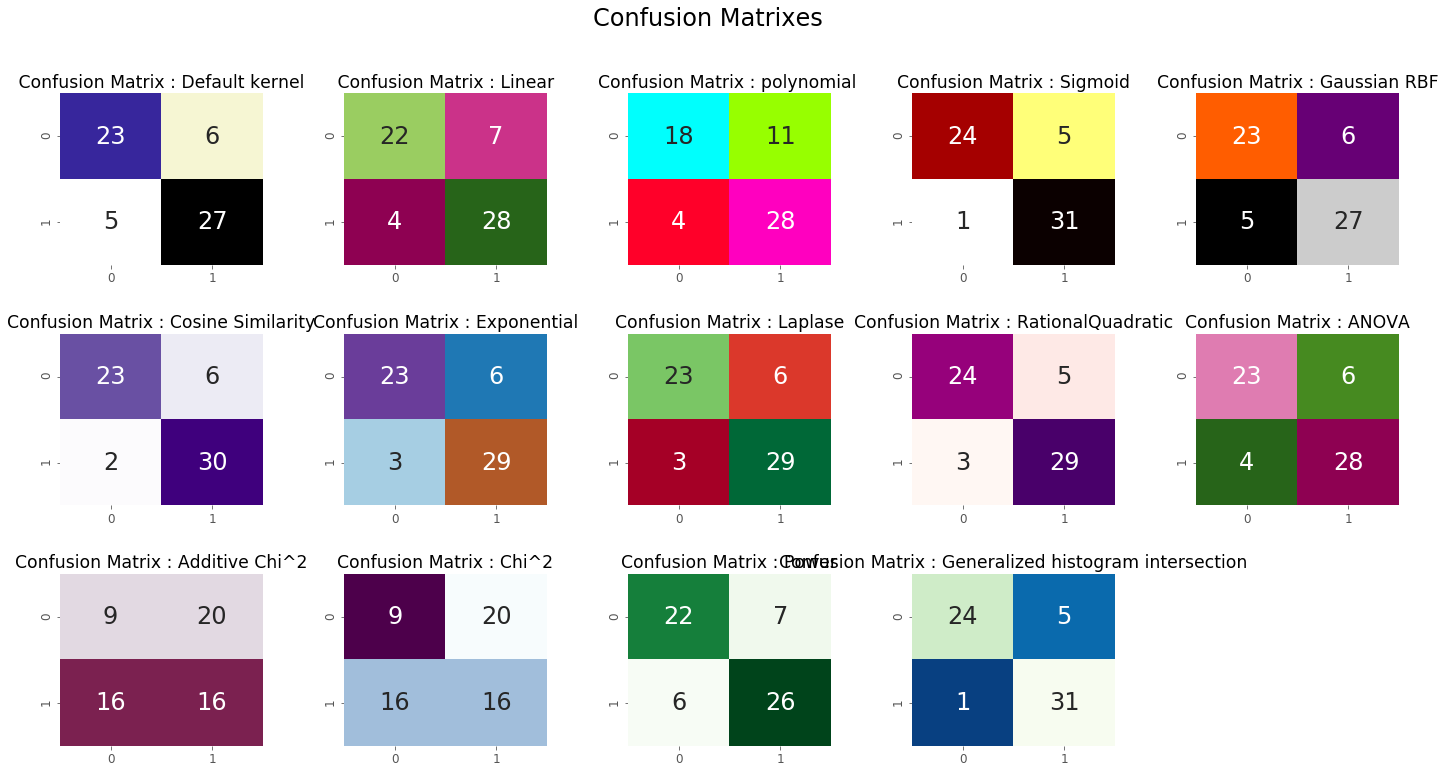

In [180]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,5,1)
plt.title(" Confusion Matrix : Default kernel ")
sns.heatmap(cn_1,annot=True,cmap="CMRmap_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,2)
plt.title(" Confusion Matrix : Linear ")
sns.heatmap(cn_2,annot=True,cmap="PiYG",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,3)
plt.title("Confusion Matrix : polynomial ")
sns.heatmap(poly_cn,annot=True,cmap="gist_rainbow",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,4)
plt.title("Confusion Matrix : Sigmoid")
sns.heatmap(sig_cn,annot=True,cmap="hot_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,5)
plt.title("Confusion Matrix : Gaussian RBF")
sns.heatmap(gaus_cn,annot=True,cmap="nipy_spectral",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,6)
plt.title("Confusion Matrix : Cosine Similarity")
sns.heatmap(cos_cn,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,7)
plt.title("Confusion Matrix : Exponential")
sns.heatmap(exp_cn,annot=True,cmap="Paired",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,8)
plt.title("Confusion Matrix : Laplase")
sns.heatmap(lap_cn,annot=True,cmap="RdYlGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,9)
plt.title("Confusion Matrix : RationalQuadratic")
sns.heatmap(rq_cn,annot=True,cmap="RdPu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,10)
plt.title("Confusion Matrix : ANOVA")
sns.heatmap(an_cn,annot=True,cmap="PiYG_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,11)
plt.title("Confusion Matrix : Additive Chi^2")
sns.heatmap(chi1_cn,annot=True,cmap="twilight",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,12)
plt.title("Confusion Matrix : Chi^2")
sns.heatmap(chi2_cn,annot=True,cmap="BuPu_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,13)
plt.title("Confusion Matrix : Power")
sns.heatmap(pow_cn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,5,14)
plt.title("Confusion Matrix : Generalized histogram intersection")
sns.heatmap(gh_cn,annot=True,cmap="GnBu_r",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Kernel Accuracy DF :

In [181]:
Accuracy

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Default SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
1,Linear SVM kernel,88.016529,81.967213,80.000000,87.500,75.862069,83.582090
2,Polynomial SVM kernel,88.016529,75.409836,71.794872,87.500,62.068966,78.873239
3,Sigmod SVM kernel,81.818182,90.163934,86.111111,96.875,82.758621,91.176471
4,Gaussian rbf SVM kernel,93.388430,81.967213,81.818182,84.375,79.310345,83.076923
5,Cosine similarity SVM kernel,85.950413,86.885246,83.333333,93.750,79.310345,88.235294
6,Exponential SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
7,Laplase SVM kernel,88.429752,85.245902,82.857143,90.625,79.310345,86.567164
8,RationalQuadratic SVM kernel,99.586777,86.885246,85.294118,90.625,82.758621,87.878788
9,ANOVA SVM kernel,90.082645,83.606557,82.352941,87.500,79.310345,84.848485


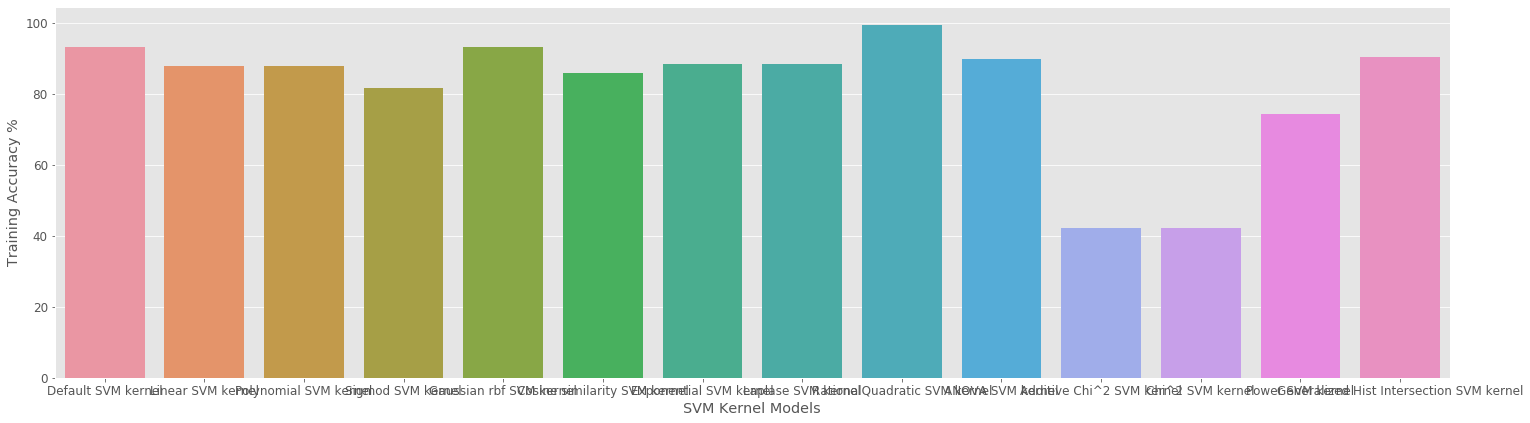

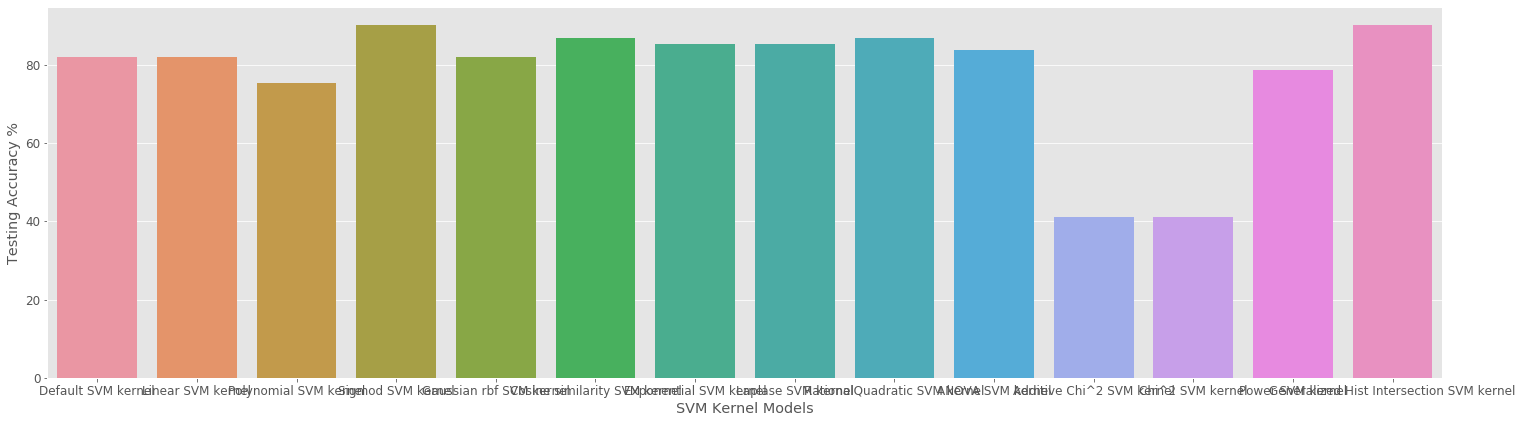

In [201]:
plt.figure(figsize=(25,15))

plt.subplot(2,1,1)
sns.barplot(x='Model',y='TrainingAccuracy',data=Accuracy)
plt.xlabel('SVM Kernel Models')
plt.ylabel('Training Accuracy %')
plt.show()

plt.figure(figsize=(25,15))
plt.subplot(2,1,2)
sns.barplot(x='Model',y='TestingAccuracy',data=Accuracy)
plt.xlabel('SVM Kernel Models')
plt.ylabel('Testing Accuracy %')
plt.show()


In [25]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.819672131147541


In [28]:
loaded_model.predict(Feature[0:1])

array([0], dtype=int64)

## Conclusion :

**Heart stroke and vascular disease are the major cause of disability and premature death. Chest pain is the key
to recognize the heart disease. In this work, the heart diseases are predicted by considering major factors with four
types of chest pain. K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Here the datasets are clustered and based upon the clusters the happening of chest pain is predicted. The role of
exploratory data using tableau provided a visual appealing and accurate clustering experience.**

**Classification of heart disease is a noteworthy test
in healthcare systems. The classification strategies give
significant data to a pathologist for diagnosis and
treatment of heart diseases. In this investigation proposed
Classification approach, for the most part, classifies the
input test data into Healthy or abnormal by utilizing
optimal kernel SVM procedure. However, the
classification accuracy accomplished is tasteful, assist
examinations are required to enhance the classification
accuracy. The Optimal kernel accomplishes bring down
execution because of the arbitrary estimation of the cost
function. Assist examination to upgrade the parameters of
the optimal kernel to enhance classification accuracy is to
be completed**